In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the data into arrays
# first column of the data file is phase data
TessPhaseHalf = np.loadtxt("GD356allTess.dat", usecols=(0))
TessPhase = np.concatenate((TessPhaseHalf, TessPhaseHalf+1))
# second column of the data file is flux data
TessFluxHalf = np.loadtxt("GD356allTess.dat", usecols=(1))
TessFlux = np.concatenate((TessFluxHalf+1, TessFluxHalf+1))
# third column of the data file is flux error
TessErrorHalf = np.loadtxt("GD356allTess.dat", usecols=(2))
TessError = np.concatenate((TessErrorHalf, TessErrorHalf))

In [3]:
def mean_data(Phase, Flux, Error, bins):

    Phase_split = np.array_split(Phase, bins)
    Flux_split = np.array_split(Flux, bins)
    Error_split = np.array_split(Error, bins)

    meanPhase = [] * bins
    meanFlux = [] * bins
    meanError = [] * bins

    for i in range(bins):

        meanPhase_i = np.mean(Phase_split[i])
        meanFlux_i = np.sum(Flux_split[i] / (Error_split[i]**2))/ np.sum(1/(Error_split[i]**2))

        meanError_i = np.sqrt(1/np.sum(1/(Error_split[i]**2)))

        meanPhase.append(meanPhase_i)
        meanFlux.append(meanFlux_i)
        meanError.append(meanError_i)
        
    return meanPhase, meanFlux, meanError

meanPhase, meanFlux, meanError = mean_data(TessPhase, TessFlux, TessError, 200)

In [4]:
import numpy as np
import starry
import exoplanet as xo
import pymc3 as pm
import pymc3_ext as pmx
import matplotlib.pyplot as plt

starry.config.lazy = True
starry.config.quiet = True

In [5]:
flux = meanFlux/np.amax(meanFlux)
flux_err = np.mean(meanError)/np.amax(meanFlux)
t = meanPhase
theta = np.multiply(meanPhase, 360)

In [52]:
starry.config.lazy = True

with pm.Model() as model:

    # Priors
    contrast = pm.Uniform("contrast", lower=0.0, upper=1.0, testval=0.3)
    radius = 20
    lat = 90-60
    lon = pm.Uniform("lon", lower=-180.0, upper=180.0, testval=0.1)
    inc = 1.4
    
    
    # Instantiate the map and add the spot
    map = starry.Map(ydeg=30)
    map.inc = inc
    map.spot(contrast=contrast, radius=radius, lat=lat, lon=lon)

    # Compute the flux model
    flux_model = map.flux(theta=theta)
    pm.Deterministic("flux_model", flux_model)

    # Save our initial guess
    flux_model_guess = pmx.eval_in_model(flux_model)

    # The likelihood function assuming known Gaussian uncertainty
    pm.Normal("obs", mu=flux_model, sd=flux_err, observed=flux)

In [53]:
with model:
    map_soln = pmx.optimize(start=model.test_point)

optimizing logp for variables: [lon, contrast]


message: Desired error not necessarily achieved due to precision loss.
logp: -11613.718467088096 -> -719.6724737057617


In [54]:
keys = ["contrast", "lon"]

param = []
print("{0:12s} {1:10s}".format("", "map_soln"))
for key in keys:
    print("{0:10s} {1:10.5f}".format(key, map_soln[key]))
    param.append(map_soln[key])

             map_soln  
contrast      0.13005
lon          45.27816


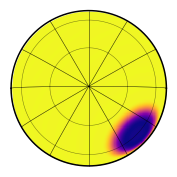

In [55]:
starry.config.lazy = False

map = starry.Map(ydeg=30)
map.spot(contrast=0.13005, radius=20, lat=90-60, lon=45.28129)
map.inc = 1.4
map.show()

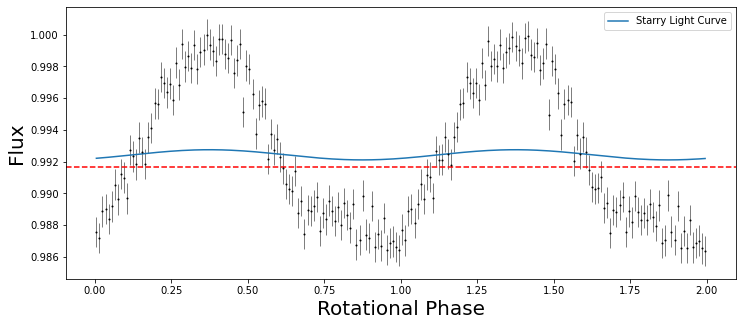

In [56]:
newFlux = map.flux(theta=theta)

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, flux, yerr=flux_err, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=np.median(flux), color='r', linestyle='--');

In [6]:
starry.config.lazy = False

map = starry.Map(ydeg=30)
map.spot(contrast=1-0.1, radius=20, lat=90-60, lon=45.28129)
map.inc = 0.7
#map.show()

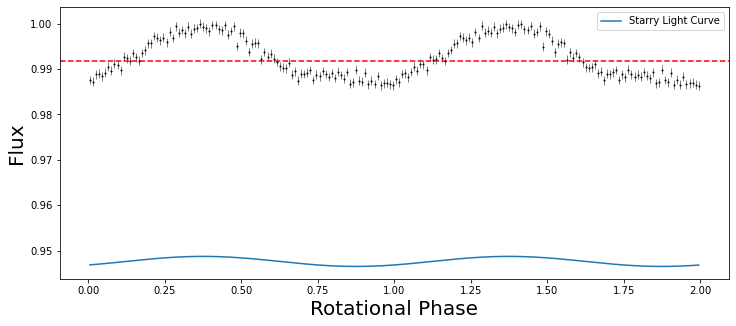

In [7]:
newFlux1 = map.flux(theta=theta)

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux1, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, flux, yerr=flux_err, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=np.median(flux), color='r', linestyle='--');

In [8]:
starry.config.lazy = False

map = starry.Map(ydeg=30)
map.spot(contrast=1-0.1, radius=20, lat=90-0.7, lon=45.28129)
map.inc = 60
#map.show()

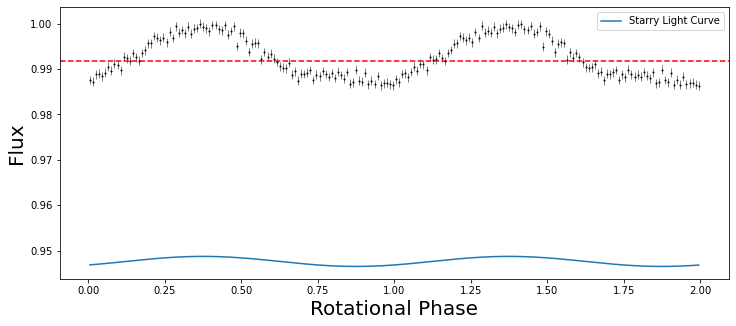

In [9]:
newFlux2 = map.flux(theta=theta)

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux2, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, flux, yerr=flux_err, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=np.median(flux), color='r', linestyle='--');

In [10]:
starry.config.lazy = False

map = starry.Map(ydeg=30)
map.spot(contrast=1-0.5, radius=20, lat=90-60, lon=45.28129)
map.inc = 1.4
#map.show()

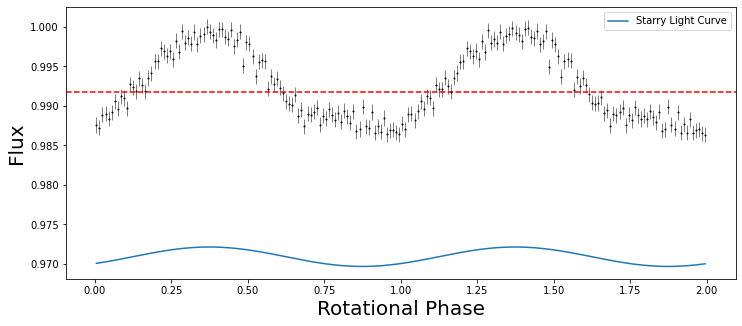

In [11]:
newFlux3 = map.flux(theta=theta)

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux3, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, flux, yerr=flux_err, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=np.median(flux), color='r', linestyle='--');

In [12]:
starry.config.lazy = False

map = starry.Map(ydeg=30)
map.spot(contrast=1-0.5, radius=20, lat=90-1.5, lon=45.28129)
map.inc = 60
#map.show()

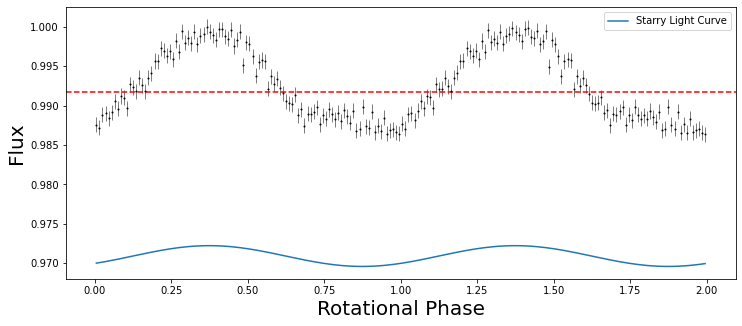

In [13]:
newFlux4 = map.flux(theta=theta)

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux4, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, flux, yerr=flux_err, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=np.median(flux), color='r', linestyle='--');

No handles with labels found to put in legend.


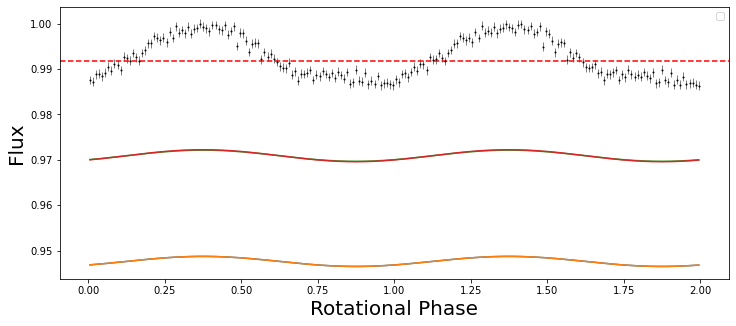

In [14]:
plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux1)
plt.plot(meanPhase, newFlux2)
plt.plot(meanPhase, newFlux3)
plt.plot(meanPhase, newFlux4)
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, flux, yerr=flux_err, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=np.median(flux), color='r', linestyle='--');

In [15]:
new_Flux1 = newFlux1/np.mean(newFlux1)
new_Flux2 = newFlux2/np.mean(newFlux2)
new_Flux3 = newFlux3/np.mean(newFlux3)
new_Flux4 = newFlux4/np.mean(newFlux4)

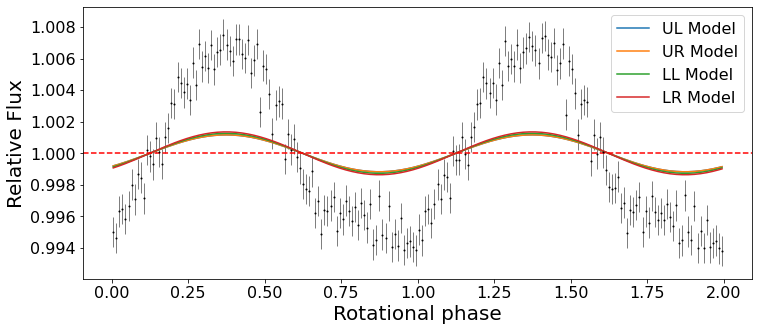

In [19]:
plt.figure(figsize=(12, 5))

plt.plot(meanPhase, new_Flux1, label='UL Model')
plt.plot(meanPhase, new_Flux2, label='UR Model')
plt.plot(meanPhase, new_Flux3, label='LL Model')
plt.plot(meanPhase, new_Flux4, label='LR Model')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend(fontsize=16)
plt.ylabel("Relative Flux", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.axhline(y=np.mean(meanFlux), color='r', linestyle='--');

In [20]:
starry.config.lazy = False

map = starry.Map(ydeg=30)
map.spot(contrast=1, radius=20, lat=90-60, lon=45.28129)
map.inc = 0.7
#map.show()

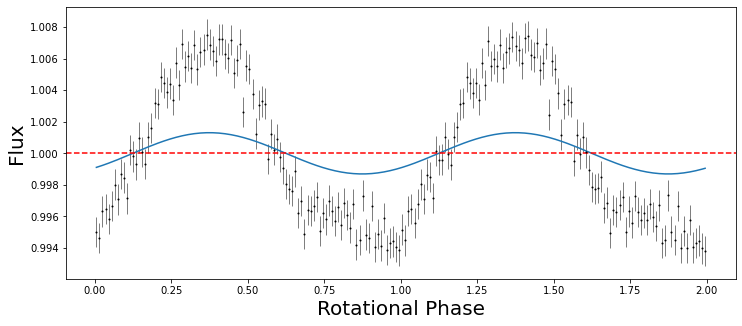

In [21]:
newFlux5 = map.flux(theta=theta)/np.mean(map.flux(theta=theta))

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux5)
plt.xlabel("Rotational phase", fontsize=20)
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=np.mean(meanFlux), color='r', linestyle='--');

In [22]:
starry.config.lazy = False

map = starry.Map(ydeg=30)
map.spot(contrast=1, radius=20, lat=90-0.7, lon=45.28129)
map.inc = 60
#map.show()

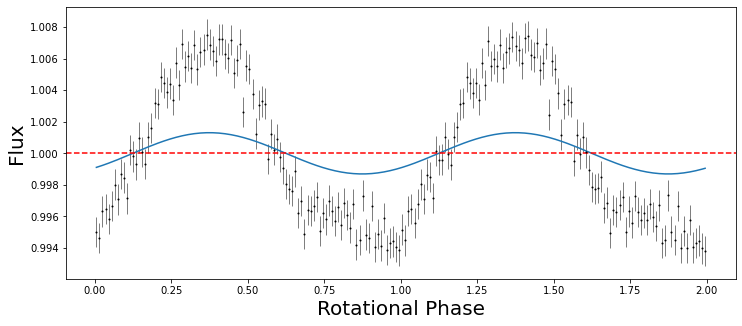

In [23]:
newFlux6 = map.flux(theta=theta)/np.mean(map.flux(theta=theta))

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux6)
plt.xlabel("Rotational phase", fontsize=20)
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=np.mean(meanFlux), color='r', linestyle='--');

In [24]:
starry.config.lazy = False

map = starry.Map(ydeg=30)
map.spot(contrast=1, radius=20, lat=90-60, lon=45.28129)
map.inc = 1.4
#map.show()

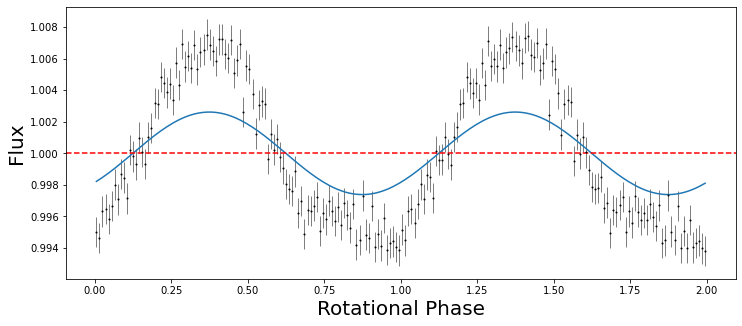

In [25]:
newFlux7 = map.flux(theta=theta)/np.mean(map.flux(theta=theta))

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux7)
plt.xlabel("Rotational phase", fontsize=20)
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=np.mean(meanFlux), color='r', linestyle='--');

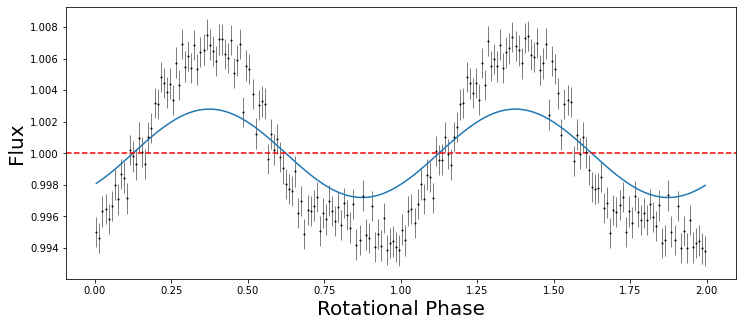

In [26]:
starry.config.lazy = False

map = starry.Map(ydeg=30)
map.spot(contrast=1, radius=20, lat=90-1.5, lon=45.28129)
map.inc = 60
#map.show()

newFlux8 = map.flux(theta=theta)/np.mean(map.flux(theta=theta))

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux8)
plt.xlabel("Rotational phase", fontsize=20)
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=np.mean(meanFlux), color='r', linestyle='--');

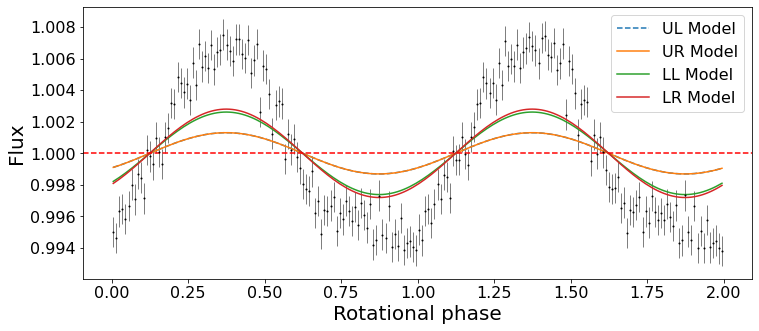

In [29]:
plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux5, label='UL Model', linestyle='--')
plt.plot(meanPhase, newFlux6, label='UR Model')
plt.plot(meanPhase, newFlux7, label='LL Model')
plt.plot(meanPhase, newFlux8, label='LR Model')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend(fontsize=16)
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=np.mean(meanFlux), color='r', linestyle='--');

In [ ]:
for radius(1, 90): 90
    for contrast(0, 1): 100
        for lat(-89, 90): 180
            for inc(1, 90): 90